# Reading isotherms

The first thing to do is to read previously created isotherms. Example data can
be found in the
[data](https://github.com/pauliacomi/pyGAPS/tree/master/docs/examples/data)
directory, saved in the pyGAPS JSON format, which we will now open. First, we'll
do the necessary top-level imports for the session.

In [8]:
import pandas as pd
from pathlib import Path

# Excel 文件路径
excel_path = Path.cwd() / 'data' / '最简单.xlsx'

# 读取 Excel
df = pd.read_excel(excel_path)

df

,c_e,q_e
0,5,3.2
1,10,5.8
2,20,8.1
3,40,11.2
4,80,13.5


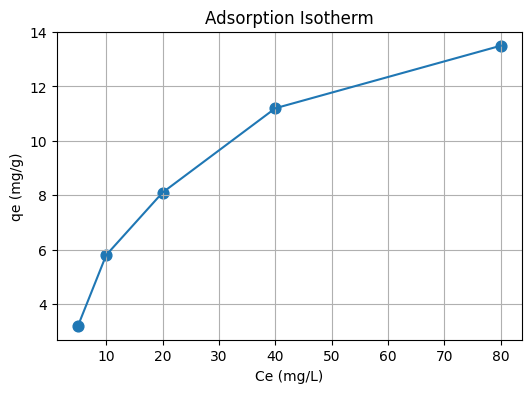

In [9]:
import pandas as pd
from pathlib import Path

# Excel 文件路径
excel_path = Path.cwd() / 'data' / '最简单.xlsx'

# 读取 Excel
df = pd.read_excel(excel_path)

df

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(df['c_e'], df['q_e'], s=60)
plt.plot(df['c_e'], df['q_e'])
plt.xlabel('Ce (mg/L)')
plt.ylabel('qe (mg/g)')
plt.title('Adsorption Isotherm')
plt.grid(True)
plt.show()

In [7]:
import numpy as np
from scipy.optimize import curve_fit

# Langmuir model
def langmuir(Ce, qm, KL):
    return qm * KL * Ce / (1 + KL * Ce)

Ce = df['c_e'].values
qe = df['q_e'].values

# 拟合 Langmuir 模型（加入参数范围限制）
params, _ = curve_fit(
    langmuir,
    Ce,
    qe,
    bounds=([0, 0], [100, 10])  # qm 在 0~100, KL 在 0~10
)

qm, KL = params
qm, KL

(np.float64(16.96498369025636), np.float64(0.048222193891928465))

In [10]:
qe_pred = langmuir(Ce, qm, KL)

ss_res = np.sum((qe - qe_pred)**2)
ss_tot = np.sum((qe - np.mean(qe))**2)
r2 = 1 - ss_res/ss_tot

r2

np.float64(0.9979055280891451)

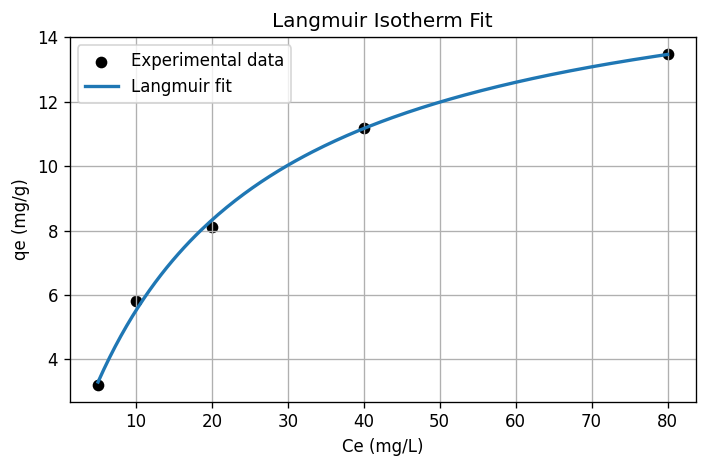

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# 原始数据
Ce = df['c_e'].values
qe = df['q_e'].values

# 拟合结果生成拟合曲线点
Ce_smooth = np.linspace(min(Ce), max(Ce), 200)
qe_fit = langmuir(Ce_smooth, qm, KL)

# 画图
plt.figure(figsize=(6,4), dpi=120)
plt.scatter(Ce, qe, color='black', label='Experimental data')
plt.plot(Ce_smooth, qe_fit, label='Langmuir fit', linewidth=2)

plt.xlabel('Ce (mg/L)')
plt.ylabel('qe (mg/g)')
plt.title('Langmuir Isotherm Fit')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

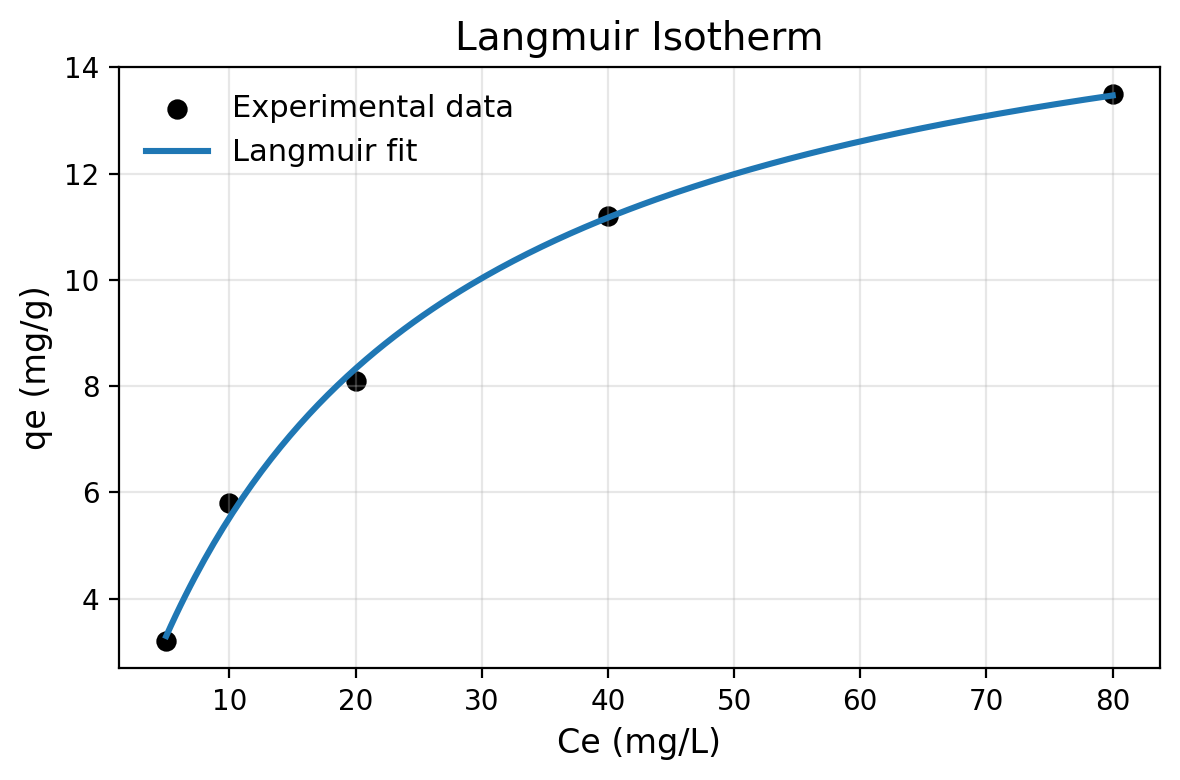

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6,4), dpi=200)

# 原始点
plt.scatter(Ce, qe, s=40, color='black', marker='o', label='Experimental data')

# 拟合线
Ce_smooth = np.linspace(min(Ce), max(Ce), 200)
qe_fit = langmuir(Ce_smooth, qm, KL)
plt.plot(Ce_smooth, qe_fit, linewidth=2.2, label='Langmuir fit')

# 论文级样式
plt.xlabel('Ce (mg/L)', fontsize=12)
plt.ylabel('qe (mg/g)', fontsize=12)
plt.title('Langmuir Isotherm', fontsize=14)

plt.grid(alpha=0.3)
plt.legend(frameon=False, fontsize=11)
plt.tight_layout()

plt.show()

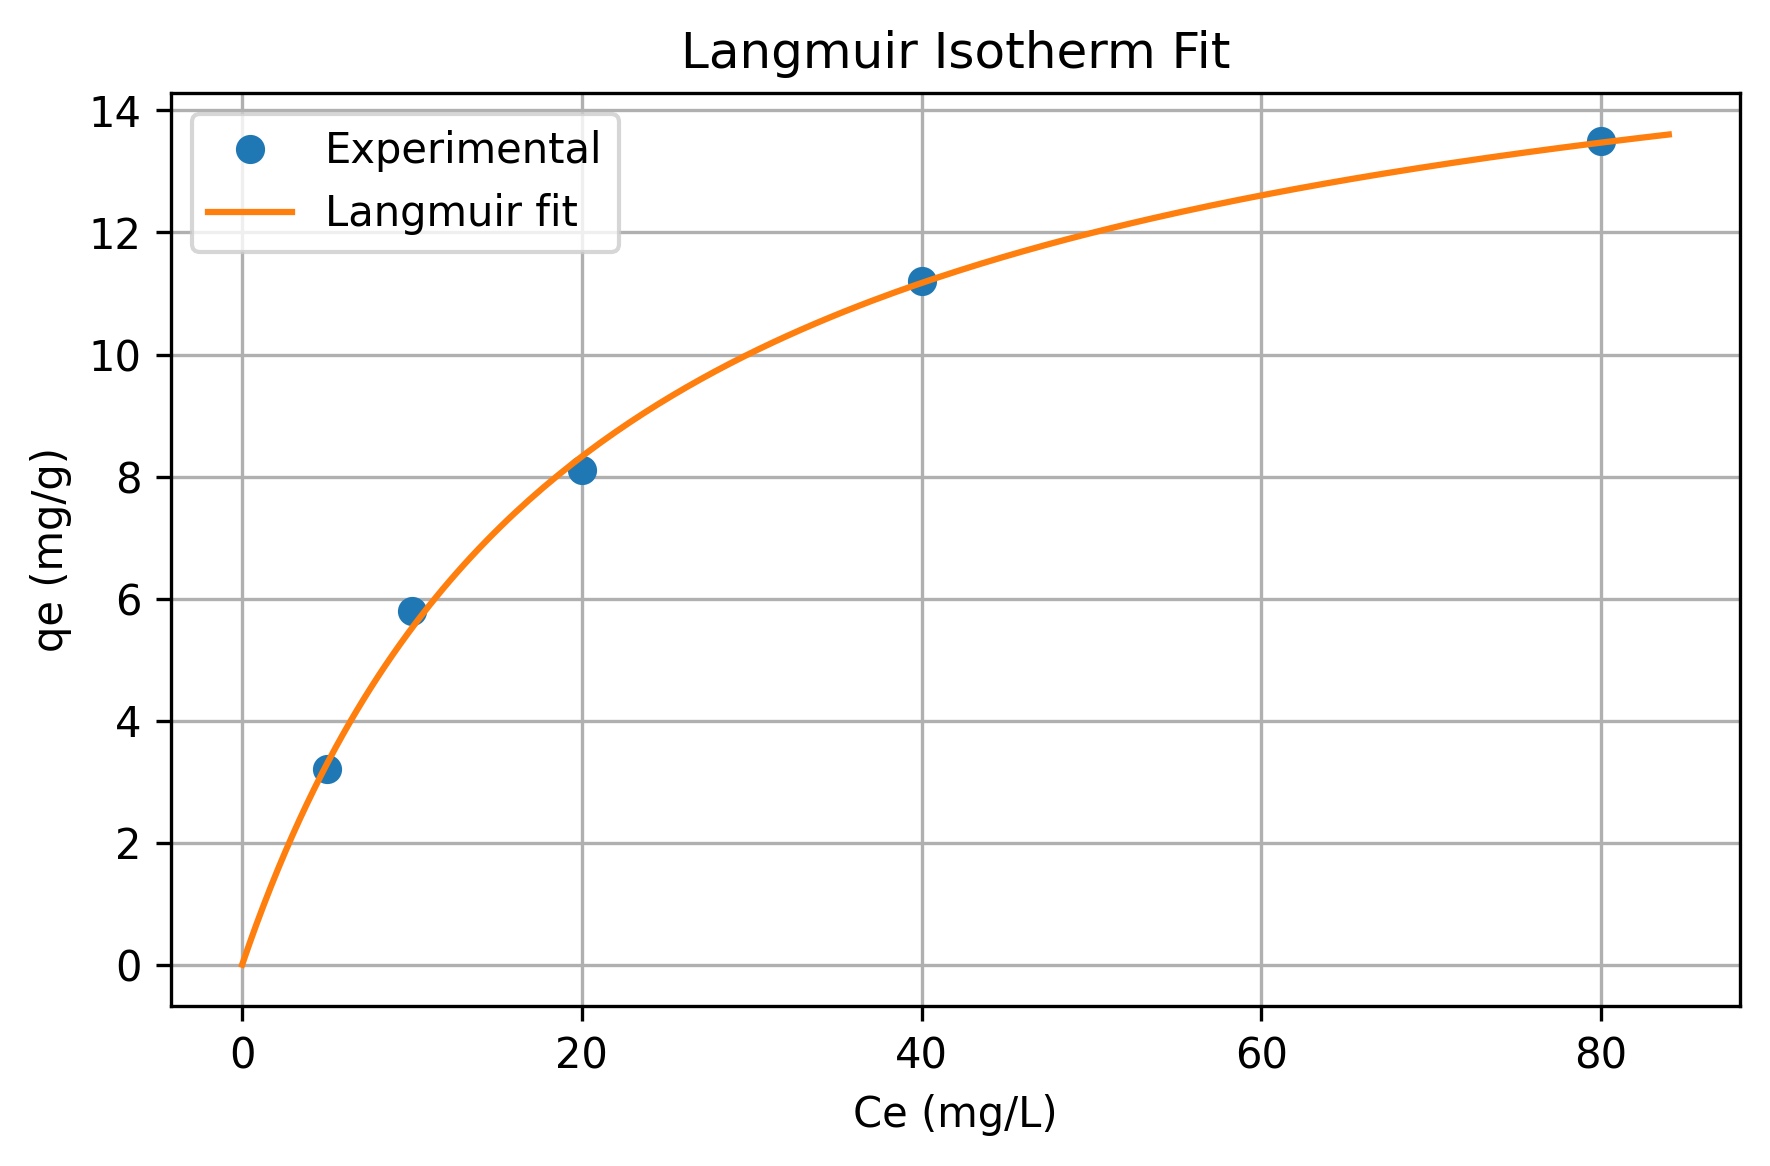

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display

# 假设 Ce, qe, qm, KL 已经存在（你前面已经拟合过了）

def langmuir(Ce, qm, KL):
    return qm * KL * Ce / (1 + KL * Ce)

# --- 重新创建一个图 ---
fig, ax = plt.subplots(figsize=(6,4))

# 画实验点
ax.plot(Ce, qe, 'o', label='Experimental', markersize=6)

# 画拟合曲线
x = np.linspace(0, max(Ce)*1.05, 200)
ax.plot(x, langmuir(x, qm, KL), '-', label='Langmuir fit')

# 设置标签
ax.set_xlabel('Ce (mg/L)')
ax.set_ylabel('qe (mg/g)')
ax.set_title('Langmuir Isotherm Fit')
ax.legend()
ax.grid(True)
fig.tight_layout()

# ---- 强制渲染（重点！不然会空）----
fig.canvas.draw()

# ---- 保存到文件 ----
fig.savefig('langmuir_fit.png', dpi=300, bbox_inches='tight', facecolor='white')
fig.savefig('langmuir_fit.jpg', dpi=300, bbox_inches='tight', facecolor='white')

# 在notebook里显示
display(Image('langmuir_fit.png'))

# 关闭图
plt.close(fig)

In [13]:
print(f"qm = {qm:.3f} mg/g")
print(f"KL = {KL:.5f} L/mg")
print(f"R² = {r2:.4f}")

qm = 16.965 mg/g
KL = 0.04822 L/mg
R² = 0.9979


In [14]:
plt.savefig('langmuir_fit.png', dpi=300)

<Figure size 640x480 with 0 Axes>

In [5]:
qe_pred = langmuir(Ce, qm, KL)
ss_res = np.sum((qe - qe_pred)**2)
ss_tot = np.sum((qe - np.mean(qe))**2)
r2 = 1 - ss_res/ss_tot
r2

np.float64(-6.184719092416913e-08)

In [1]:
from pathlib import Path
import pygaps.parsing as pgp

json_path = Path.cwd() / 'data'

Then we'll import the json files, by using the `isotherm_from_json` method which
reads an isotherm from a file (or a string). There are four folders:

- One containing nitrogen adsorption data at 77 kelvin

In [2]:
# Get the nitrogen data at 77 kelvin
isotherms_n2_77k_paths = Path(json_path / 'characterisation').rglob("*.json")
isotherms_n2_77k = [pgp.isotherm_from_json(filepath) for filepath in isotherms_n2_77k_paths]
print('Selected', len(isotherms_n2_77k), 'isotherms with nitrogen at 77K')

Selected 5 isotherms with nitrogen at 77K


- Another with room-temperature adsorption of $CO_2$ combined with microcalorimetry

In [3]:
# Get the combined isotherm-calorimetry data
isotherms_calorimetry_paths = Path(json_path / 'calorimetry').rglob("*.json")
isotherms_calorimetry = [
    pgp.isotherm_from_json(filepath) for filepath in isotherms_calorimetry_paths
]
print('Selected', len(isotherms_calorimetry), 'room temperature calorimetry isotherms')

Selected 2 room temperature calorimetry isotherms


- Some room-temperature isotherms which we will use for IAST calculations

In [4]:
# Get the isotherms for IAST calculations
isotherms_iast_paths = Path(json_path / 'iast').rglob("*.json")
isotherms_iast = [pgp.isotherm_from_json(filepath) for filepath in isotherms_iast_paths]
print('Selected', len(isotherms_iast), 'isotherms for IAST calculation')

Selected 2 isotherms for IAST calculation


- A set of isotherms with $C_4H_{10}$ at different temperature, for isosteric enthalpy calculations

In [5]:
# Get the isotherms for isosteric enthalpy calculations
isotherms_isosteric_paths = list(Path(json_path / 'enth_isosteric').rglob("*.json"))
isotherms_isosteric = [pgp.isotherm_from_json(filepath) for filepath in isotherms_isosteric_paths]
print('Selected', len(isotherms_isosteric), 'isotherms for isosteric enthalpy calculation')

Selected 3 isotherms for isosteric enthalpy calculation


- Isotherms used for Whittaker enthalpy calculations

In [ ]:
isotherms_enth_whittaker_paths = list(Path(json_path / 'enth_whittaker').rglob("*.aiff"))
isotherms_enth_whittaker = [
    pgp.isotherm_from_aif(filepath) for filepath in isotherms_enth_whittaker_paths
]